In [11]:
import pandas as pd

ad_enrichment_pathway_df = pd.read_csv('./pathway_enrichment.txt', sep='\t')
display(ad_enrichment_pathway_df)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[ad_enrichment_pathway_df['FDR'] < 0.0001]
ad_enrichment_pathway_df = ad_enrichment_pathway_df[['Term', 'Genes', 'PValue', 'FDR']]

# Function to count the number of genes
def count_genes(gene_string):
    return len(gene_string.split(', '))

# Add the 'Number_of_Genes' column
ad_enrichment_pathway_df['Number_of_Genes'] = ad_enrichment_pathway_df['Genes'].apply(count_genes)
ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)

# Remove the rows if the 'Term' column contains 'cancer' (case-insensitive)
ad_enrichment_pathway_df = ad_enrichment_pathway_df[~ad_enrichment_pathway_df['Term'].str.contains('cancer', case=False)]
ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)

# Keep only the lowest 20 FDR pathways
ad_enrichment_pathway_df = ad_enrichment_pathway_df.sort_values('FDR').head(20)
ad_enrichment_pathway_df = ad_enrichment_pathway_df.reset_index(drop=True)
display(ad_enrichment_pathway_df)

# Removing the colon and everything after it in the "Term" column
ad_enrichment_pathway_df['Term_num'] = ad_enrichment_pathway_df['Term'].str.split(':').str[0]
display(ad_enrichment_pathway_df)


,Category,Term,Count,%,PValue,Genes,List Total,Pop Hits,Pop Total,Fold Enrichment,Bonferroni,Benjamini,FDR
0,KEGG_PATHWAY,hsa04660:T cell receptor signaling pathway,10,50.0,1.109060e-12,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",20,122,8840,36.229508,2.062950e-10,2.062852e-10,7.097987e-11
1,KEGG_PATHWAY,hsa05160:Hepatitis C,10,50.0,1.244011e-11,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",20,159,8840,27.798742,2.313870e-09,1.156930e-09,3.980835e-10
2,KEGG_PATHWAY,hsa04151:PI3K-Akt signaling pathway,11,55.0,7.793335e-10,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",20,362,8840,13.430939,1.449560e-07,4.831868e-08,1.662578e-08
3,KEGG_PATHWAY,hsa04730:Long-term depression,7,35.0,1.917366e-09,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",20,60,8840,51.566667,3.566301e-07,8.915753e-08,3.067786e-08
4,KEGG_PATHWAY,hsa04071:Sphingolipid signaling pathway,8,40.0,3.522978e-09,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",20,122,8840,28.983607,6.552737e-07,1.310548e-07,4.509412e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,GOTERM_MF_DIRECT,GO:0008233~peptidase activity,2,10.0,9.221489e-02,"CASP8, MALT1",20,98,19304,19.697959,9.999925e-01,4.166747e-01,3.620288e-01
285,UP_KW_CELLULAR_COMPONENT,KW-0472~Membrane,11,55.0,9.520389e-02,"SMPD2, GSK3B, MAP2K1, PLA2G4F, MAPK8, PLA2G4E,...",16,8340,17942,1.479032,6.989707e-01,2.856117e-01,2.856117e-01
286,GOTERM_BP_DIRECT,GO:0007059~chromosome segregation,2,10.0,9.556286e-02,"PPP2R1B, PPP2R1A",20,104,19734,18.975000,1.000000e+00,7.536844e-01,7.410629e-01
287,GOTERM_BP_DIRECT,GO:0034599~cellular response to oxidative stress,2,10.0,9.556286e-02,"MAPK8, FOXO1",20,104,19734,18.975000,1.000000e+00,7.536844e-01,7.410629e-01


,Term,Genes,PValue,FDR,Number_of_Genes
0,hsa04660:T cell receptor signaling pathway,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",1.109060e-12,7.097987e-11,10
1,hsa05160:Hepatitis C,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",1.244011e-11,3.980835e-10,10
2,hsa04151:PI3K-Akt signaling pathway,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",7.793335e-10,1.662578e-08,11
3,hsa04730:Long-term depression,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",1.917366e-09,3.067786e-08,7
4,hsa04071:Sphingolipid signaling pathway,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",3.522978e-09,4.509412e-08,8
5,hsa04664:Fc epsilon RI signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, PIK3R3, PRKCA...",4.539042e-09,4.841644e-08,7
6,hsa04014:Ras signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, INSR, PIK3R3,...",1.436750e-08,1.313600e-07,9
7,hsa04012:ErbB signaling pathway,"GSK3B, MAP2K1, MAPK8, MYC, PIK3R3, PRKCA, SOS2",1.742212e-08,1.393770e-07,7
8,hsa05161:Hepatitis B,"NFKBIA, MAP2K1, MAPK8, CASP8, MYC, PIK3R3, PRK...",2.665010e-08,1.895118e-07,8
9,hsa05142:Chagas disease,"NFKBIA, MAPK8, CASP8, PPP2R1B, PPP2R1A, PIK3R3...",5.185245e-08,2.552736e-07,7


,Term,Genes,PValue,FDR,Number_of_Genes,Term_num
0,hsa04660:T cell receptor signaling pathway,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",1.109060e-12,7.097987e-11,10,hsa04660
1,hsa05160:Hepatitis C,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",1.244011e-11,3.980835e-10,10,hsa05160
2,hsa04151:PI3K-Akt signaling pathway,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",7.793335e-10,1.662578e-08,11,hsa04151
3,hsa04730:Long-term depression,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",1.917366e-09,3.067786e-08,7,hsa04730
4,hsa04071:Sphingolipid signaling pathway,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",3.522978e-09,4.509412e-08,8,hsa04071
5,hsa04664:Fc epsilon RI signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, PIK3R3, PRKCA...",4.539042e-09,4.841644e-08,7,hsa04664
6,hsa04014:Ras signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, INSR, PIK3R3,...",1.436750e-08,1.313600e-07,9,hsa04014
7,hsa04012:ErbB signaling pathway,"GSK3B, MAP2K1, MAPK8, MYC, PIK3R3, PRKCA, SOS2",1.742212e-08,1.393770e-07,7,hsa04012
8,hsa05161:Hepatitis B,"NFKBIA, MAP2K1, MAPK8, CASP8, MYC, PIK3R3, PRK...",2.665010e-08,1.895118e-07,8,hsa05161
9,hsa05142:Chagas disease,"NFKBIA, MAPK8, CASP8, PPP2R1B, PPP2R1A, PIK3R3...",5.185245e-08,2.552736e-07,7,hsa05142


C:\Users\hemingzhang\AppData\Local\Temp\ipykernel_16224\1285812864.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



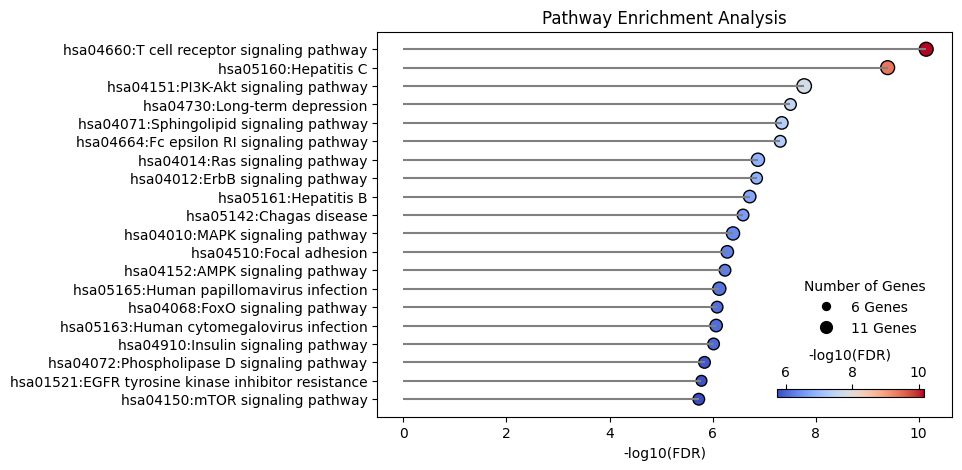

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.lines import Line2D

# plot the lolipop plot but ranked from the highest to the lowest

# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 5))

# Generate a sequence of numbers corresponding to the rows in your DataFrame
y = np.arange(len(ad_enrichment_pathway_df))

# Normalize the FDR values for colormap
norm = mcolors.Normalize(vmin=min(-np.log10(ad_enrichment_pathway_df['FDR'])), 
                         vmax=max(-np.log10(ad_enrichment_pathway_df['FDR'])))
cmap = cm.get_cmap('coolwarm')  # Blue to red colormap

# Assume the size of points represents the number of genes (adjust according to your data)
sizes = ad_enrichment_pathway_df['Number_of_Genes'] * 10  # Adjust

# Create horizontal lines from x=0 to the -log10(FDR) values
ax.hlines(y, 0, -np.log10(ad_enrichment_pathway_df['FDR']), color='grey')

# Plot points with colors from the colormap and sizes reflecting the number of genes
sc = ax.scatter(-np.log10(ad_enrichment_pathway_df['FDR']), y, 
                c=-np.log10(ad_enrichment_pathway_df['FDR']), cmap=cmap, s=sizes, edgecolor='black')

# Set y-axis ticks and labels to correspond to pathway names
ax.set_yticks(y)
ax.set_yticklabels(ad_enrichment_pathway_df['Term'])

# Set the x-axis label
ax.set_xlabel('-log10(FDR)')
ax.invert_yaxis()

# Set the plot title
ax.set_title('Pathway Enrichment Analysis')

# Create legend for the number of genes with only two markers (min and max)
min_size = min(ad_enrichment_pathway_df['Number_of_Genes'])
max_size = max(ad_enrichment_pathway_df['Number_of_Genes'])
size_legend = [
    Line2D([0], [0], marker='o', color='w', label=f'{int(min_size)} Genes',
           markerfacecolor='black', markersize=np.sqrt(min_size * 10)),
    Line2D([0], [0], marker='o', color='w', label=f'{int(max_size)} Genes',
           markerfacecolor='black', markersize=np.sqrt(max_size * 10))
]

# Add the number of genes legend, positioned below the colorbar legend
ax.legend(handles=size_legend, title='Number of Genes', loc='lower right', bbox_to_anchor=(0.975, 0.18), frameon=False)

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Create an inset for the colorbar inside the main plot
cax = inset_axes(ax, width='30%', height='3%', loc='lower right',
                 bbox_to_anchor=(0.1, 0.05, 0.85, 0.725), bbox_transform=ax.transAxes, borderpad=0)

# Add a colorbar to represent the FDR values in the inset
cbar = plt.colorbar(sc, cax=cax, orientation='horizontal')
cbar.set_label('-log10(FDR)')
cbar.ax.xaxis.set_label_position('top')
cbar.ax.xaxis.set_ticks_position('top')

# Adjust layout to make room for the legends
plt.subplots_adjust(right=0.7)  # Adjust this to give more space

# Display the plot
plt.show()



In [17]:


from bioservices import KEGG

# Initialize the KEGG service
kegg = KEGG()

# Example pathway ID (you can replace 'hsa04010' with any other pathway ID)
pathway_id_list = ad_enrichment_pathway_df['Term_num'].tolist()
pathway_class_list = []

for pathway_id in pathway_id_list:
    # Retrieve the pathway information
    pathway_info = kegg.get(pathway_id)

    # Extract the pathway class
    lines = pathway_info.split("\n")
    for line in lines:
        if line.startswith("CLASS"):
            pathway_class = line.replace("CLASS       ", "").strip()
            pathway_class_list.append(pathway_class)
            # print(f"Pathway ID: {pathway_id}")
            # print(f"Pathway Class: {pathway_class}")

# Add the 'Pathway_Class' column
ad_enrichment_pathway_df['Pathway_Class'] = pathway_class_list
display(ad_enrichment_pathway_df)

,Term,Genes,PValue,FDR,Number_of_Genes,Term_num,Pathway_Class
0,hsa04660:T cell receptor signaling pathway,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",1.109060e-12,7.097987e-11,10,hsa04660,Organismal Systems; Immune system
1,hsa05160:Hepatitis C,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",1.244011e-11,3.980835e-10,10,hsa05160,Human Diseases; Infectious disease: viral
2,hsa04151:PI3K-Akt signaling pathway,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",7.793335e-10,1.662578e-08,11,hsa04151,Environmental Information Processing; Signal t...
3,hsa04730:Long-term depression,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",1.917366e-09,3.067786e-08,7,hsa04730,Organismal Systems; Nervous system
4,hsa04071:Sphingolipid signaling pathway,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",3.522978e-09,4.509412e-08,8,hsa04071,Environmental Information Processing; Signal t...
5,hsa04664:Fc epsilon RI signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, PIK3R3, PRKCA...",4.539042e-09,4.841644e-08,7,hsa04664,Organismal Systems; Immune system
6,hsa04014:Ras signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, INSR, PIK3R3,...",1.436750e-08,1.313600e-07,9,hsa04014,Environmental Information Processing; Signal t...
7,hsa04012:ErbB signaling pathway,"GSK3B, MAP2K1, MAPK8, MYC, PIK3R3, PRKCA, SOS2",1.742212e-08,1.393770e-07,7,hsa04012,Environmental Information Processing; Signal t...
8,hsa05161:Hepatitis B,"NFKBIA, MAP2K1, MAPK8, CASP8, MYC, PIK3R3, PRK...",2.665010e-08,1.895118e-07,8,hsa05161,Human Diseases; Infectious disease: viral
9,hsa05142:Chagas disease,"NFKBIA, MAPK8, CASP8, PPP2R1B, PPP2R1A, PIK3R3...",5.185245e-08,2.552736e-07,7,hsa05142,Human Diseases; Infectious disease: parasitic


In [18]:
# Remove the element content after the first semicolon in the 'Pathway_Class' column
ad_enrichment_pathway_df['Pathway_Class_detail'] = ad_enrichment_pathway_df['Pathway_Class'].str.split(';').str[1]
display(ad_enrichment_pathway_df)

,Term,Genes,PValue,FDR,Number_of_Genes,Term_num,Pathway_Class,Pathway_Class_detail
0,hsa04660:T cell receptor signaling pathway,"NFKBIA, GSK3B, MAP2K1, MAPK8, PPP2R1B, PPP2R1A...",1.109060e-12,7.097987e-11,10,hsa04660,Organismal Systems; Immune system,Immune system
1,hsa05160:Hepatitis C,"NFKBIA, GSK3B, MAP2K1, CASP8, PPP2R1B, PPP2R1A...",1.244011e-11,3.980835e-10,10,hsa05160,Human Diseases; Infectious disease: viral,Infectious disease: viral
2,hsa04151:PI3K-Akt signaling pathway,"GSK3B, MAP2K1, PPP2R1B, PPP2R1A, MYC, INSR, PI...",7.793335e-10,1.662578e-08,11,hsa04151,Environmental Information Processing; Signal t...,Signal transduction
3,hsa04730:Long-term depression,"MAP2K1, PLA2G4F, PPP2R1B, PLA2G4E, PPP2R1A, PR...",1.917366e-09,3.067786e-08,7,hsa04730,Organismal Systems; Nervous system,Nervous system
4,hsa04071:Sphingolipid signaling pathway,"SMPD2, MAP2K1, MAPK8, PPP2R1B, PPP2R1A, PIK3R3...",3.522978e-09,4.509412e-08,8,hsa04071,Environmental Information Processing; Signal t...,Signal transduction
5,hsa04664:Fc epsilon RI signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, PIK3R3, PRKCA...",4.539042e-09,4.841644e-08,7,hsa04664,Organismal Systems; Immune system,Immune system
6,hsa04014:Ras signaling pathway,"MAP2K1, PLA2G4F, MAPK8, PLA2G4E, INSR, PIK3R3,...",1.436750e-08,1.313600e-07,9,hsa04014,Environmental Information Processing; Signal t...,Signal transduction
7,hsa04012:ErbB signaling pathway,"GSK3B, MAP2K1, MAPK8, MYC, PIK3R3, PRKCA, SOS2",1.742212e-08,1.393770e-07,7,hsa04012,Environmental Information Processing; Signal t...,Signal transduction
8,hsa05161:Hepatitis B,"NFKBIA, MAP2K1, MAPK8, CASP8, MYC, PIK3R3, PRK...",2.665010e-08,1.895118e-07,8,hsa05161,Human Diseases; Infectious disease: viral,Infectious disease: viral
9,hsa05142:Chagas disease,"NFKBIA, MAPK8, CASP8, PPP2R1B, PPP2R1A, PIK3R3...",5.185245e-08,2.552736e-07,7,hsa05142,Human Diseases; Infectious disease: parasitic,Infectious disease: parasitic


In [19]:
import pandas as pd
import plotly.graph_objects as go


# Prepare data for the Sankey plot
labels = list(ad_enrichment_pathway_df['Pathway_Class_detail'].unique()) + list(ad_enrichment_pathway_df['Term']) + [gene for genes in ad_enrichment_pathway_df['Genes'] for gene in genes.split(', ')]

source = []
target = []
value = []

# Map overall signaling pathways to terms
for i, row in ad_enrichment_pathway_df.iterrows():
    source.append(labels.index(row['Pathway_Class_detail']))
    target.append(labels.index(row['Term']))
    value.append(1)

# Map terms to genes
for i, row in ad_enrichment_pathway_df.iterrows():
    for gene in row['Genes'].split(', '):
        source.append(labels.index(row['Term']))
        target.append(labels.index(gene))
        value.append(1)

# Create the Sankey plot
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
))

# Update layout
fig.update_layout(title_text='Sankey Diagram: Overall Signaling Pathways to Terms to Genes', font_size=10)

# Display the plot
fig.write_html('./sankey_diagram.html')
